In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from bs4 import BeautifulSoup
import re


In [2]:
pd.set_option('display.max_columns',84)
df=pd.read_csv('survey_results_public.csv')
schema_df=pd.read_csv('survey_results_schema.csv')

In [3]:
df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back

In [64]:
schema_df

,qid,qname,question,force_resp,type,selector
0,QID16,S0,Hello world! Thank you for taking the 2023 Sta...,False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,You consent to providing your information to h...,False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,Basic Information The first section will focus...,False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [6]:
# Function to clean the unnecessary HTML tags wrapped around 'question' column of "schema_df"
def clean_html(text):
  soup = BeautifulSoup(text, 'html.parser')
  return soup.get_text()

#assign the cleansed column to schema_df
schema_df['question'] = schema_df['question'].apply(clean_html)


In [7]:
#view of first few rows
schema_df.head()


,qid,qname,question,force_resp,type,selector
0,QID16,S0,Hello world! \n \nThank you for taking the 202...,False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,You consent to providing your information to h...,False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,Basic Information\n\nThe first section will fo...,False,DB,TB


In [8]:
#accessing particular row element
schema_df['question'][4]

'Basic Information\n\nThe first section will focus on some basic information about who you are.\n\nMost questions in this section are required. Required questions are noted with *.'

In [9]:


# Function to remove extra newlines
def remove_extra_newlines(text):
  import re
  return re.sub(r'\n+', '\n', text)

# Apply the function to the Series
schema_df['question'] = schema_df['question'].apply(remove_extra_newlines)

schema_df['question']

0     Hello world! \n \nThank you for taking the 202...
1                                     Browser Meta Info
2     You consent to providing your information to h...
3                                                      
4     Basic Information\nThe first section will focu...
                            ...                        
73    Waiting on answers to questions often causes i...
74    I feel like I have the tools and/or resources ...
75    Needing help from people outside of your immed...
76    Interacting with people outside of your immedi...
77    Encountering knowledge silos (where one indivi...
Name: question, Length: 78, dtype: object

In [10]:
# Function to remove extra newlines
def remove_extra_newlines(text):
  return ' '.join(text.split())

# Apply the function to the Series
schema_df['question'] = schema_df['question'].apply(remove_extra_newlines)
#Successfully removed '/n /n' extra line and white spaces from the 'question' column.
schema_df.head()


,qid,qname,question,force_resp,type,selector
0,QID16,S0,Hello world! Thank you for taking the 2023 Sta...,False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,You consent to providing your information to h...,False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,Basic Information The first section will focus...,False,DB,TB


In [11]:
#
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [12]:
df['ConvertedCompYearly'].mean()

103110.08171765343

In [13]:
def extract_database_counts(df, column_name):
  """Extracts database counts from a DataFrame column.

  Args:
    df: The pandas DataFrame containing the data.
    column_name: The name of the column to process.

  Returns:
    A pandas Series with database counts in descending order.
  """

  # Explode the column into a list of databases
  exploded_df = df[column_name].str.split(';').explode()

  # Remove leading/trailing whitespace and convert to lowercase
  exploded_df = exploded_df.str.strip().str.lower()

  # Count the occurrences of each database
  database_counts = exploded_df.value_counts(normalize=True)

  return database_counts.head(10)

data = df['DatabaseHaveWorkedWith']


# Extract and count databases
database_counts = extract_database_counts(df, 'DatabaseHaveWorkedWith')

print(database_counts)

postgresql              0.157074
mysql                   0.141685
sqlite                  0.106540
mongodb                 0.087993
microsoft sql server    0.087768
redis                   0.070368
mariadb                 0.060721
elasticsearch           0.046179
oracle                  0.033778
dynamodb                0.030588
Name: DatabaseHaveWorkedWith, dtype: float64


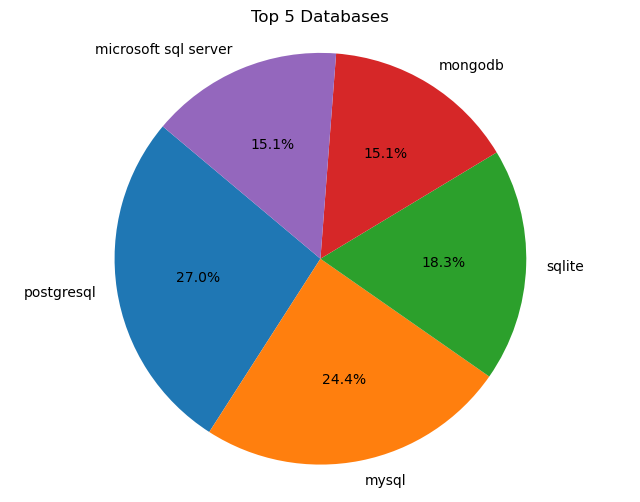

In [14]:
# Get the top 5 values
top_5_databases = database_counts.head(5)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio for a circular pie
plt.title('Top 5 Databases')
plt.show()

In [15]:
df['ToolsTechHaveWorkedWith']

0                                                      NaN
1              Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn
2                         Cargo;Docker;Kubernetes;Make;Nix
3                           Homebrew;npm;Vite;Webpack;Yarn
4                                  Docker;npm;Webpack;Yarn
                               ...                        
89179    Chocolatey;CMake;Docker;Maven (build tool);npm...
89180                               Maven (build tool);Pip
89181                                                Cargo
89182                    Docker;Kubernetes;npm;Podman;Vite
89183              Docker;npm;NuGet;pnpm;Vite;Webpack;Yarn
Name: ToolsTechHaveWorkedWith, Length: 89184, dtype: object

In [16]:
# these code lines are repititive in nature, you may take take help of GEMINI/GPT to avoid repeating nature.

def extract_tool_counts(df, column_name):
  """Extracts tool counts from a DataFrame column.

  Args:
    df: The pandas DataFrame containing the data.
    column_name: The name of the column to process.

  Returns:
    A pandas Series with tool counts in descending order.
  """

  # Explode the column into a list of tools
  exploded_df = df[column_name].str.split(';').explode()

  # Remove leading/trailing whitespace and convert to lowercase
  exploded_df = exploded_df.str.strip().str.lower()

  # Count the occurrences of each tool
  tool_counts = exploded_df.value_counts()

  return tool_counts


data = df['ToolsTechHaveWorkedWith']

# Extract and count tools
tool_counts = extract_tool_counts(df, 'ToolsTechHaveWorkedWith')

tool_counts.head(12)

docker                41369
npm                   39609
pip                   23281
homebrew              17647
yarn                  17545
webpack               16665
make                  16161
kubernetes            15260
nuget                 12235
maven (build tool)    12109
gradle                11961
vite                  11807
Name: ToolsTechHaveWorkedWith, dtype: int64

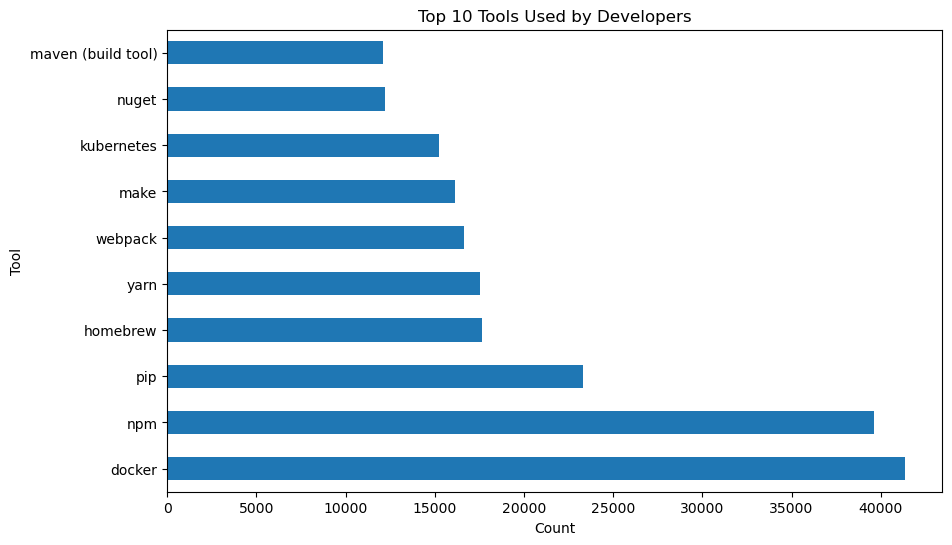

In [17]:

top_10_tools = tool_counts.head(10)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_tools.plot(kind='barh')
plt.title('Top 10 Tools Used by Developers')
plt.xlabel('Count')
plt.ylabel('Tool')
plt.show()

In [18]:
df['MainBranch'].value_counts(normalize=True)

I am a developer by profession                                                           0.753913
I am not primarily a developer, but I write code sometimes as part of my work/studies    0.100399
I am learning to code                                                                    0.055627
I code primarily as a hobby                                                              0.055615
I used to be a developer by profession, but no longer am                                 0.020867
None of these                                                                            0.013579
Name: MainBranch, dtype: float64

In [19]:
grouped_data = df.groupby('Country')['ConvertedCompYearly']

# Print the grouped data
print(grouped_data)

# Function to get the top salary for each group
def get_top_salary_per_country(grouped_data):
    top_salaries = grouped_data.max()
    return top_salaries

# Get the top salary for each country
top_salaries = get_top_salary_per_country(grouped_data)
print(top_salaries)


Country
Afghanistan                             9203683.0
Albania                                  139700.0
Algeria                                   37776.0
Andorra                                  289142.0
Angola                                     7942.0
                                          ...    
Venezuela, Bolivarian Republic of...     180000.0
Viet Nam                                 125000.0
Yemen                                     59917.0
Zambia                                    41122.0
Zimbabwe                                 114000.0
Name: ConvertedCompYearly, Length: 185, dtype: float64


In [20]:
def extract_database_counts(df, column_name):
  """Extracts database counts from a DataFrame column.

  Args:
    df: The pandas DataFrame containing the data.
    column_name: The name of the column to process.

  Returns:
    A pandas Series with database counts in descending order.
  """

  # Explode the column into a list of databases
  exploded_df = df[column_name].str.split(' ').explode()

  # Remove leading/trailing whitespace and convert to lowercase
  exploded_df = exploded_df.str.strip()

  # Count the occurrences of each database
  database_counts = exploded_df.value_counts(normalize=True)

  return database_counts.head(10)

data = df['DatabaseHaveWorkedWith']


# Extract and count databases
database_counts = extract_database_counts(df, 'DatabaseHaveWorkedWith')

print(database_counts)

SQL                 0.144002
Microsoft           0.078609
Realtime            0.036462
Server              0.033723
PostgreSQL          0.032114
Cloud               0.030659
MySQL               0.023004
Access;Microsoft    0.017400
SQLite              0.016972
Cosmos              0.016278
Name: DatabaseHaveWorkedWith, dtype: float64


Correlation between YearsCoding and Salary: 0.03567940547993797


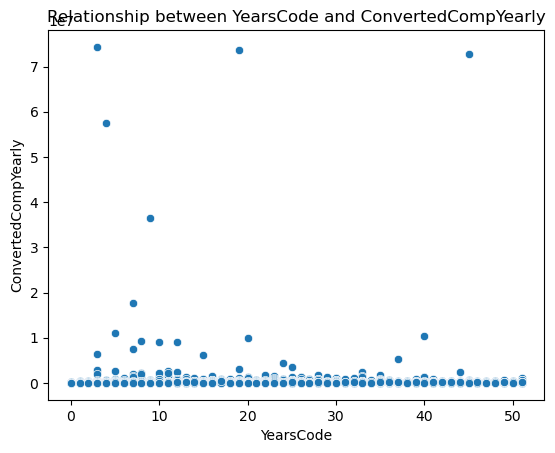

In [21]:
# Create a new DataFrame with relevant columns and drop rows with NaN values
new_df = df[['YearsCode', 'ConvertedCompYearly']].dropna()


new_df['YearsCode'] = new_df['YearsCode'].replace('Less than 1 year', 0)
new_df['YearsCode'] = new_df['YearsCode'].replace('More than 50 years', 51)

# Convert 'YearsCode' and 'ConvertedCompYearly' to numeric
new_df['YearsCode'] = pd.to_numeric(new_df['YearsCode'])
new_df['ConvertedCompYearly'] = pd.to_numeric(new_df['ConvertedCompYearly'])

# Calculate the correlation coefficient
correlation = new_df['YearsCode'].corr(new_df['ConvertedCompYearly'])

print("Correlation between YearsCoding and Salary:", correlation)

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='YearsCode', y='ConvertedCompYearly', data=new_df)
plt.title('Relationship between YearsCode and ConvertedCompYearly')
plt.xlabel('YearsCode')
plt.ylabel('ConvertedCompYearly')
plt.show()

In [22]:
'''0.03567 suggests a very weak positive correlation between the variables "YearsCode" and "ConvertedCompYearly". 
This means that there's a slight tendency for individuals with more years of coding experience to have higher salaries, 
but the relationship is not strong.'''




'0.03567 suggests a very weak positive correlation between the variables "YearsCode" and "ConvertedCompYearly". \nThis means that there\'s a slight tendency for individuals with more years of coding experience to have higher salaries, \nbut the relationship is not strong.'

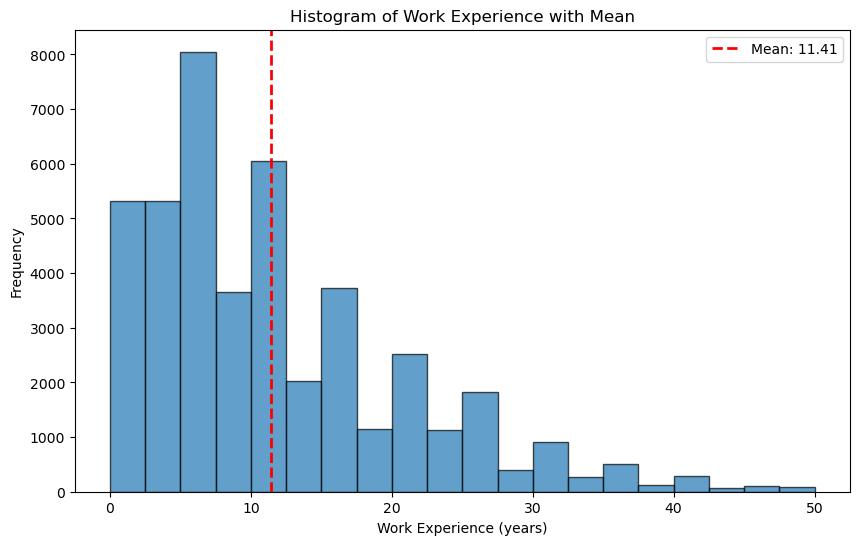

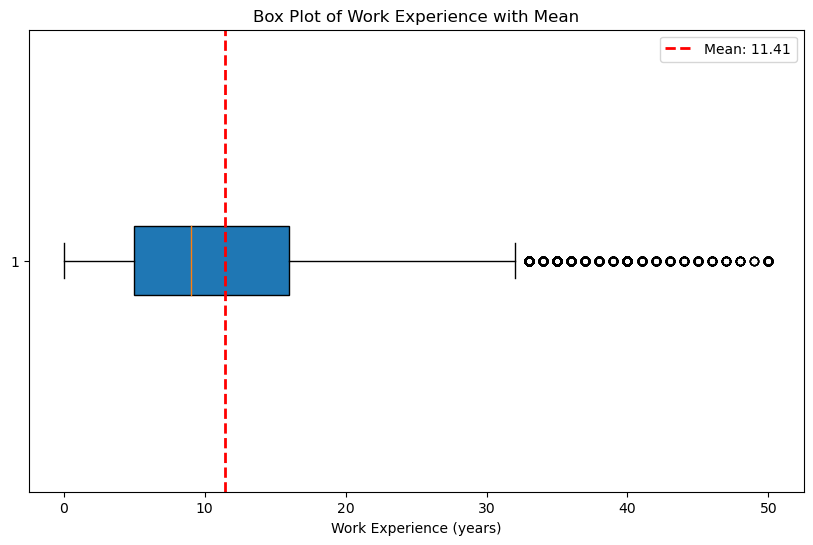

In [78]:
# Drop NaN values
work_exp = df['WorkExp'].dropna()

# Calculate the mean
mean_work_exp = work_exp.mean()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(work_exp, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(mean_work_exp, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_work_exp:.2f}')
plt.title('Histogram of Work Experience with Mean')
plt.xlabel('Work Experience (years)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(work_exp, vert=False, patch_artist=True)
plt.axvline(mean_work_exp, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_work_exp:.2f}')
plt.title('Box Plot of Work Experience with Mean')
plt.xlabel('Work Experience (years)')
plt.legend()
plt.show()

'''Histogram: This plot shows the distribution of WorkExp values. The red dashed line represents the mean, 
giving a visual comparison between the mean and the actual distribution.

Box Plot: This plot provides a summary of the WorkExp data with median, quartiles, 
and potential outliers. The red dashed line shows where the mean lies compared to the median and spread of the data'''


#Name: Ashish Kumar Singh; UIET,PU

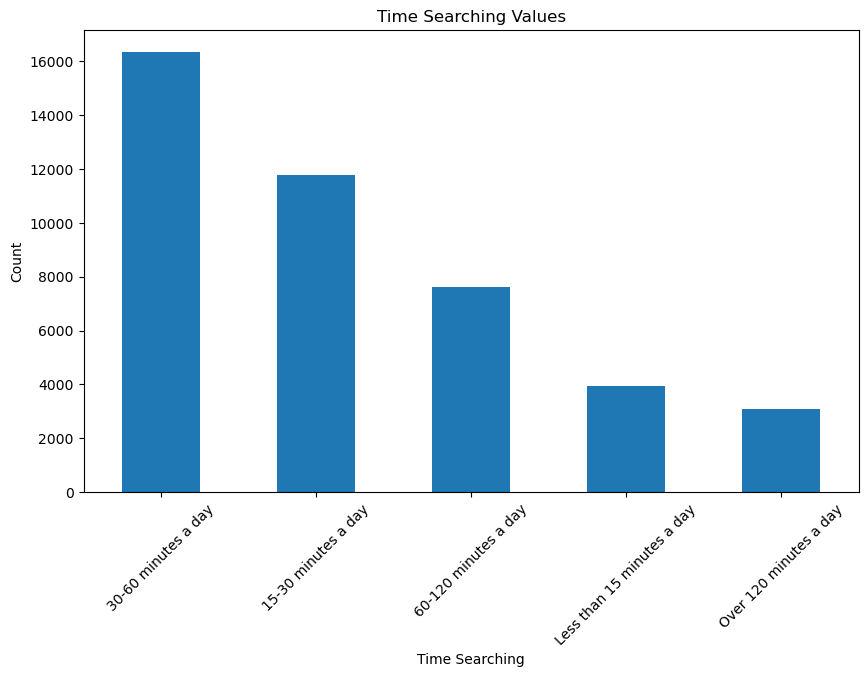

In [24]:

time_searching = df['TimeSearching'].dropna().value_counts().head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
time_searching.plot(kind='bar')

# Customize the chart
plt.title('Top 10 Time Searching Values')
plt.xlabel('Time Searching')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the chart
plt.show()


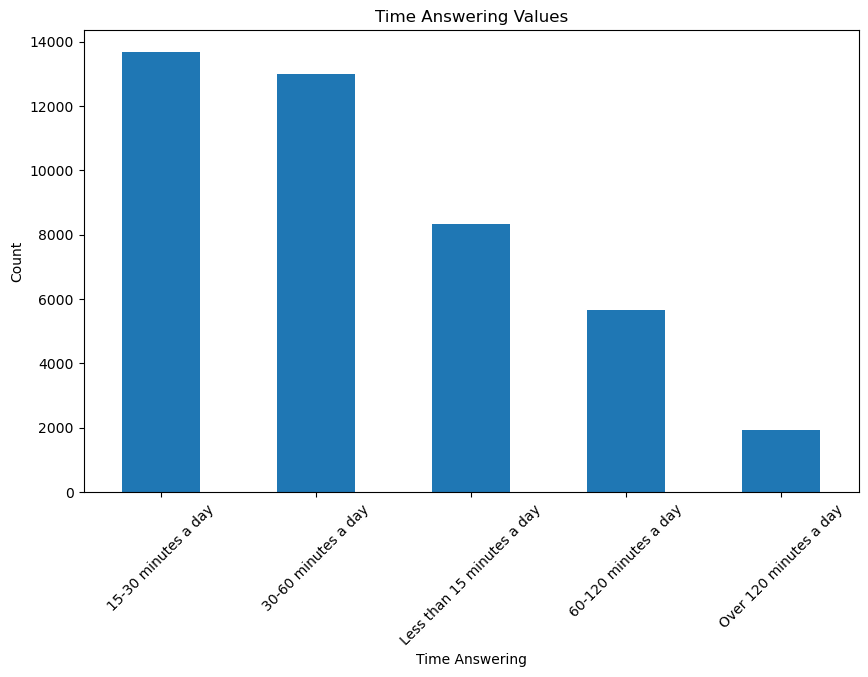

In [25]:
time_searching =df['TimeAnswering'].dropna().value_counts().head(10)
plt.figure(figsize=(10, 6))
time_searching.plot(kind='bar')

# Customize the chart
plt.title('Time Answering Values')
plt.xlabel('Time Answering')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the chart
plt.show()


In [26]:
df['TimeAnswering'].dropna().value_counts().head(10)

15-30 minutes a day           13678
30-60 minutes a day           13013
Less than 15 minutes a day     8321
60-120 minutes a day           5674
Over 120 minutes a day         1943
Name: TimeAnswering, dtype: int64

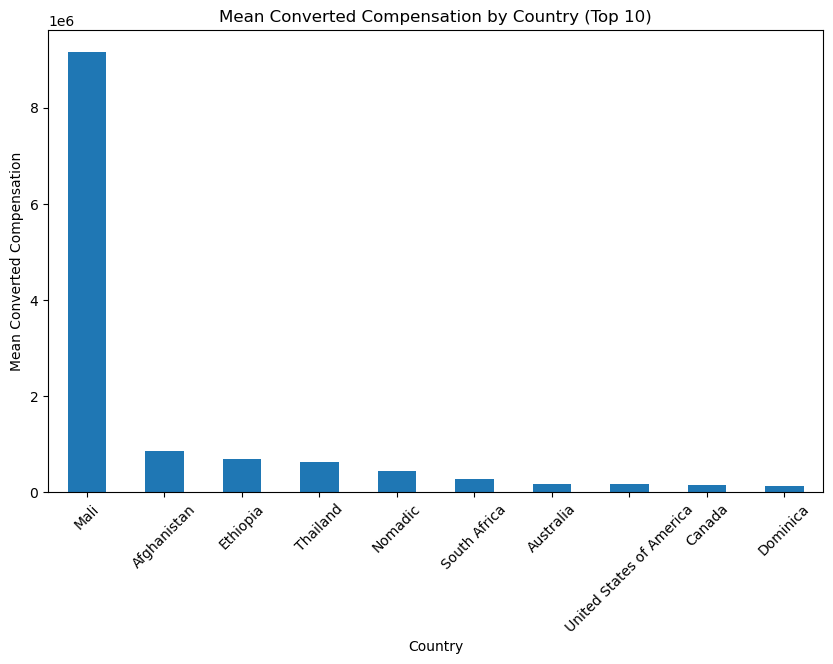

In [27]:
# Group the data by country and calculate the mean 'ConvertedCompYearly'
grouped_data = df.groupby('Country')['ConvertedCompYearly'].mean().sort_values(ascending=False)

# Select the top 10 countries with the highest mean 'ConvertedCompYearly'
top_10_countries = grouped_data.head(10)

# Create a bar chart to visualize the mean 'ConvertedCompYearly' for the top 10 countries
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar')

# Customize the chart
plt.title('Mean Converted Compensation by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Mean Converted Compensation')
plt.xticks(rotation=45)

# Show the chart
plt.show()

In [28]:


def parse_age_string_pandas(age_series):
    
    # Extract the numbers from the strings using regular expressions
    pattern = r"(\d+)-(\d+) years old"
    age_series = age_series.astype(str).str.extract(pattern, expand=False)

    # Calculate the average age for each row
    age_series['avg_age'] = (age_series[0].astype(float) + age_series[1].astype(float)) / 2
    age_series = age_series['avg_age']

    # Handle invalid values
    age_series = age_series.fillna(np.nan)  # Replace NaN with np.nan

    return age_series



df['Age'] = parse_age_string_pandas(df['Age'])
df['Age']



0        21.0
1        29.5
2        49.5
3        29.5
4        29.5
         ... 
89179    29.5
89180    21.0
89181     NaN
89182     NaN
89183    39.5
Name: Age, Length: 89184, dtype: float64

In [29]:
#Age-wise AI tool users/popularity
df[['Age','AISearchHaveWorkedWith']].value_counts()

Age   AISearchHaveWorkedWith                            
29.5  ChatGPT                                               13028
39.5  ChatGPT                                                7230
21.0  ChatGPT                                                6915
49.5  ChatGPT                                                2497
29.5  Bing AI;ChatGPT                                        2302
                                                            ...  
39.5  Bing AI;ChatGPT;Phind;Quora Poe                           1
21.0  Bing AI;ChatGPT;Neeva AI;WolframAlpha;You.com             1
39.5  Bing AI;ChatGPT;Perplexity AI;You.com                     1
      Bing AI;ChatGPT;Perplexity AI;WolframAlpha;You.com        1
21.0  Perplexity AI;You.com                                     1
Length: 677, dtype: int64

In [30]:
#Accessing  developers type.
arr=['Developer','full-stack','System administrator']
for i in arr:
    print(df['DevType'].str.contains(i).value_counts())

True     54887
False    21985
Name: DevType, dtype: int64
False    51137
True     25735
Name: DevType, dtype: int64
False    76129
True       743
Name: DevType, dtype: int64


In [35]:
 # HYPOTHESIS TESTING (Using SciPy.stats)
df_over_35 = df[df['Age'] > 35]

# Calculate sample statistics
sample_mean = df_over_35['ConvertedCompYearly'].mean()
sample_std = df_over_35['ConvertedCompYearly'].std()
sample_size = df_over_35.shape[0]

# Calculate t-statistic
t_stat = (sample_mean - 50000) / (sample_std / np.sqrt(sample_size))

# Calculate p-value
p_value = stats.t.sf(t_stat, df=sample_size - 1)

# Compare p-value to significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Average salary of people over 35 is significantly different from $50,000.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the average salary of people over 35 is different from $50,000.")

Reject the null hypothesis: Average salary of people over 35 is significantly different from $50,000.


In [36]:
#Chi-Square test for discovering association between remote work arrangements and country.

# Drop rows with NaN values in either column
df_filtered = df.dropna(subset=['RemoteWork', 'Country'])

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['RemoteWork'], df_filtered['Country'])

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
'''Summary
A strong association was found between remote work arrangements and country.
The chi-square test, with a p-value of 0.0 and a large chi-square statistic of 11397.55, 
indicates a highly significant relationship between these two variables. 
This suggests that the choice of remote work (fully remote, hybrid, or in-person) 
is likely influenced by the specific country.'''

Chi-square statistic: 11397.551475211265
P-value: 0.0


In [45]:
# Create a contingency table
contingency_table = pd.crosstab(df['DevType'], df['LearnCode'])

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

'''CONCLUSION:


Chi-square statistic: 36492.97993892641
P-value: 0.0


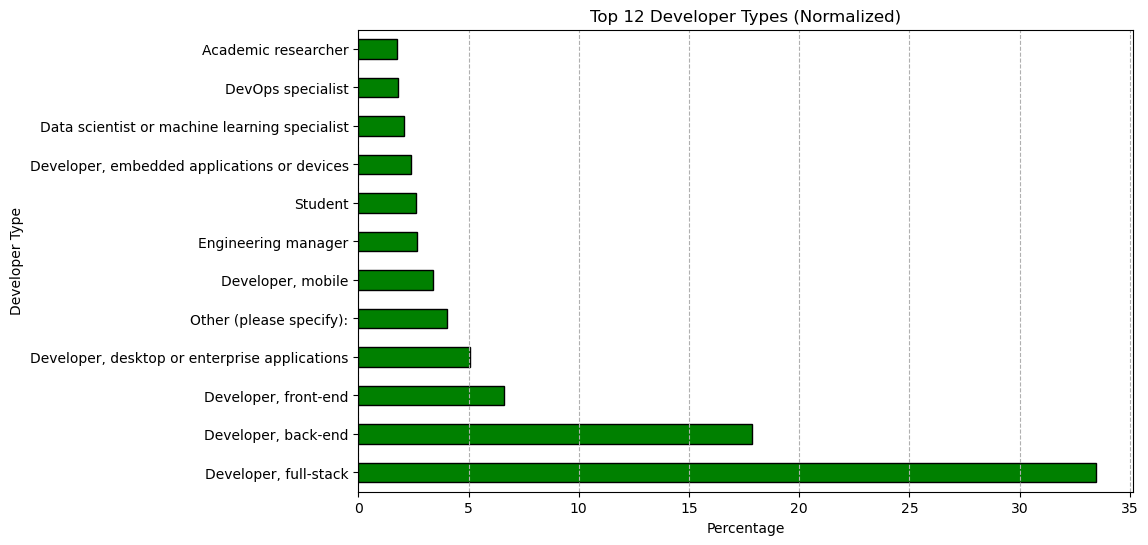

In [54]:
#Some more plots 
#1. Top 12 Developers Type plot.

# Get the top 12 most frequent `DevType` values as percentages
dev_type_percentages = df['DevType'].value_counts(normalize=True).head(12) * 100

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
dev_type_percentages.plot(kind='barh', color='green', edgecolor='black')
plt.title('Top 12 Developer Types (Normalized)')
plt.xlabel('Percentage')
plt.ylabel('Developer Type')
plt.grid(axis='x', linestyle='--')
plt.show()

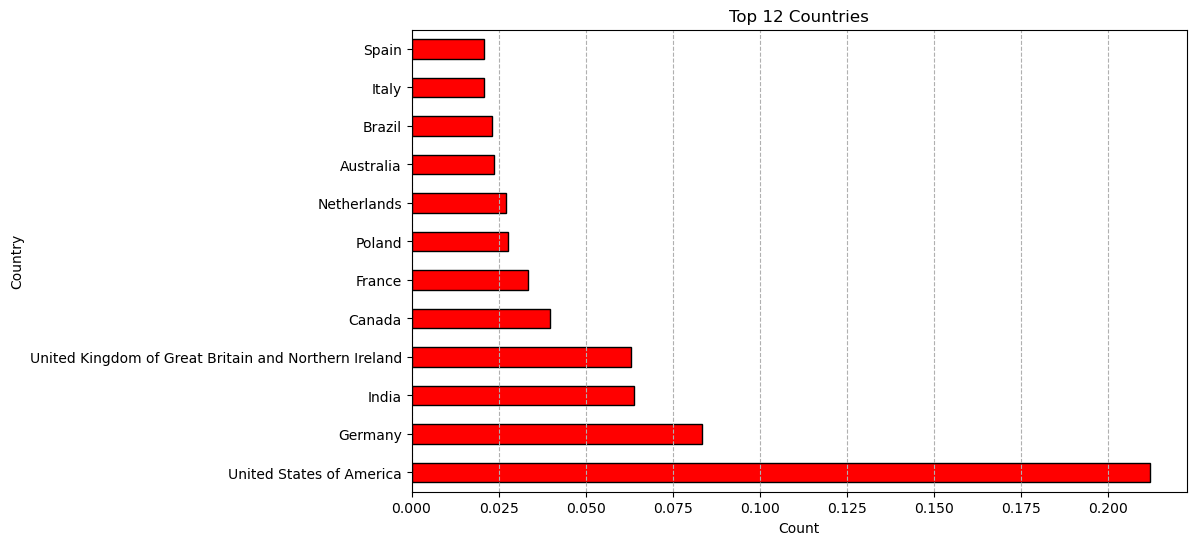

In [55]:
# Number of Devlopers Country-wise percentage count (plot)

country_counts = df['Country'].value_counts(normalize=True).head(12)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='barh', color='red', edgecolor='black')
plt.title('Top 12 Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--')
plt.show()